In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# shows images larger
def display(img, cmap='gray'):
    fig = plt.figure(figsize=(12,10))
    ax = fig.add_subplot(111)
    ax.imshow(img, cmap='gray')

In [3]:
reeses = cv2.imread('Computer-Vision-with-Python/DATA/reeses_puffs.png',0)


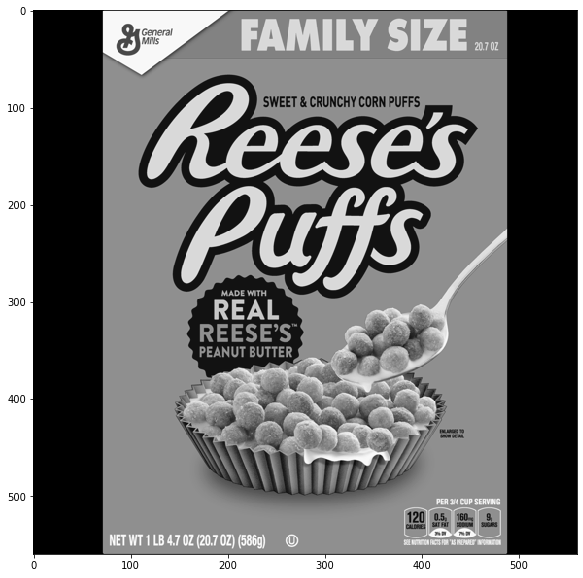

In [4]:
display(reeses)

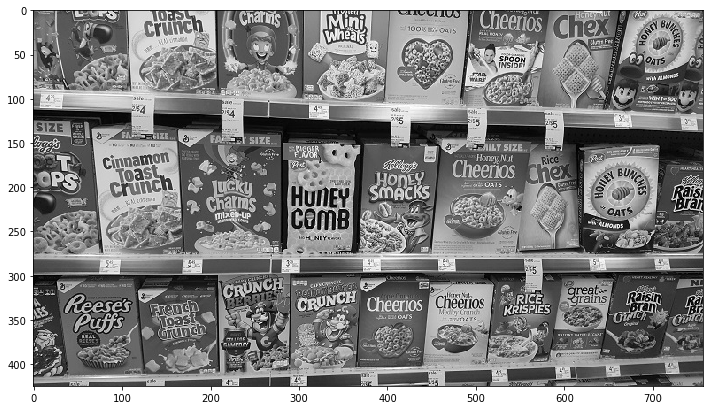

In [5]:
cereals = cv2.imread('Computer-Vision-with-Python/DATA/many_cereals.jpg',0)
display(cereals)

In [6]:
# brute force detectors with orb descriptors method
orb = cv2.ORB_create()

In [7]:
kp1, des1 = orb.detectAndCompute(reeses, None)
kp2, des2 = orb.detectAndCompute(cereals, None)

In [8]:
bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)

In [9]:
matches = bf.match(des1, des2)

In [10]:
single_match = matches[0]

In [11]:
# how close one match was from the actual image
single_match.distance

54.0

In [12]:
matches = sorted(matches, key=lambda x:x.distance)

In [13]:
# sticks together the match image and the matching image
# and draws lines on where it thinks it found a match
reeses_matches = cv2.drawMatches(reeses,kp1,cereals,kp2,matches[:25],None, flags=2)

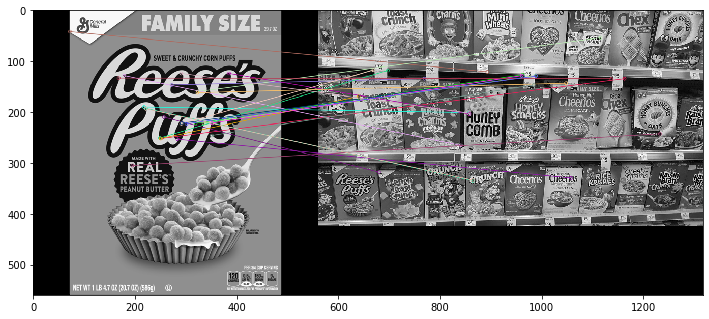

In [14]:
display(reeses_matches) # BF with orb descriptors doesnt really work well

SIFT (SCALE-INVARIANT FEATURE TRANSFORM) DESCRIPTORS METHOD

In [15]:
sift = cv2.xfeatures2d.SIFT_create()

In [16]:
# Detects keypoints and computes the descriptors
kp1,des1 = sift.detectAndCompute(reeses, None)
kp2,des2 = sift.detectAndCompute(cereals, None)

In [17]:
bf = cv2.BFMatcher()

In [18]:
# Finds the k best matches for each descriptor from a query set.
matches = bf.knnMatch(des1, des2, k=2)

In [19]:
good  = []

# LESS DISTANCE == BETTER MATCH

# RATION MATCH 1 < 75% MATCH 2
for match1,match2 in matches:
    # IF MATCH 1 DISTANCE IS LESS THAN 75% OF MATCH 2 DISTANCE
    # THEN DESCRIPTOR IS A GOOD MATCH, LETS KEEP IT
    if match1.distance < 0.75*match2.distance:
        good.append([match1])
        
        

In [21]:
len(good)

78

In [22]:
len(matches)

1500

In [23]:
sift_matches = cv2.drawMatchesKnn(reeses, kp1, cereals, kp2, good, None, flags=2)

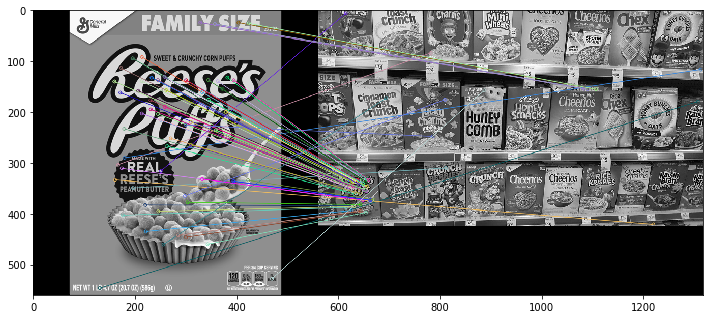

In [24]:
display(sift_matches)

FLANN BASED MATCHER

In [25]:
sift = cv2.xfeatures2d.SIFT_create()

In [26]:
# Detects keypoints and computes the descriptors
kp1,des1 = sift.detectAndCompute(reeses, None)
kp2,des2 = sift.detectAndCompute(cereals, None)

In [28]:
# FLANN PARAMETERS (faster than brute force but doenst necessarily
# finds the best matching)
FLANN_INDEX_KDTREE = 0
index_params = dict(algorithm=FLANN_INDEX_KDTREE,trees=5)
search_params = dict(checks=50)


In [29]:
flann = cv2.FlannBasedMatcher(index_params, search_params)

In [35]:
matches = flann.knnMatch(des1, des2, k=2)

In [36]:
matchesMask = [[0,0] for i in range(len(matches))] 

In [37]:
# BULDING A MASK 
for i,(match1,match2) in enumerate(matches):
    if match1.distance < 0.75*match2.distance:
        matchesMask[i] = [1,0]
    

        

In [38]:
draw_params = dict(matchColor = (0,255,0), singlePointColor=(255,0,0), matchesMask=matchesMask,
                  flags=0)

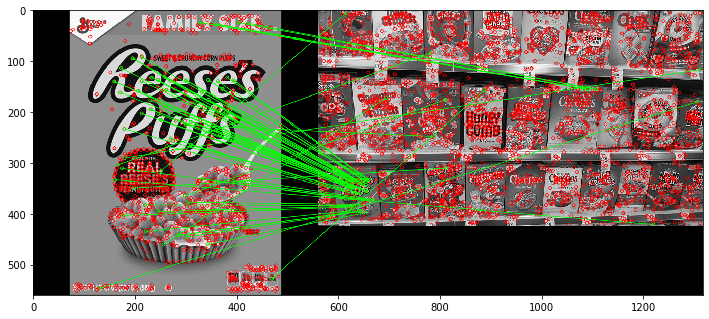

In [39]:
flann_matches = cv2.drawMatchesKnn(reeses, kp1, cereals, kp2, matches, None, **draw_params)
display(flann_matches)